In [70]:
import sys
import os
import numpy as np
sys.path.insert(1, '../')


from src.padim_model import train as padim_train
from src.stn_model import train as stn_train
from src import utils


CLASS_NAMES = ['bottle', 'cable', 'capsule', 'carpet', 'grid',
               'hazelnut', 'leather', 'metal_nut', 'pill', 'screw',
               'tile', 'toothbrush', 'transistor', 'wood', 'zipper']
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
utils.set_seed()

In [59]:
stn_model,train_loader = stn_train.start(data_dir ='../data/mvtec_anomaly_detection',
                      batch_size = 32,learning_rate = 0.001,num_epochs = 1)

['bottle', 'cable', 'capsule', 'carpet', 'grid', 'hazelnut', 'leather', 'metal_nut', 'pill', 'screw', 'tile', 'toothbrush', 'transistor', 'wood', 'zipper']
Training ..


/media/cristian/12FF1F6D0CD48422/Research/Fatima/env_fat/lib/python3.9/site-packages/torch/nn/functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/media/cristian/12FF1F6D0CD48422/Research/Fatima/env_fat/lib/python3.9/site-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


Epoch 1/1, Loss: 8.037361960822254e-05
Finished Training


torch.Size([32, 3, 224, 224])


/media/cristian/12FF1F6D0CD48422/Research/Fatima/env_fat/lib/python3.9/site-packages/torch/nn/functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/media/cristian/12FF1F6D0CD48422/Research/Fatima/env_fat/lib/python3.9/site-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


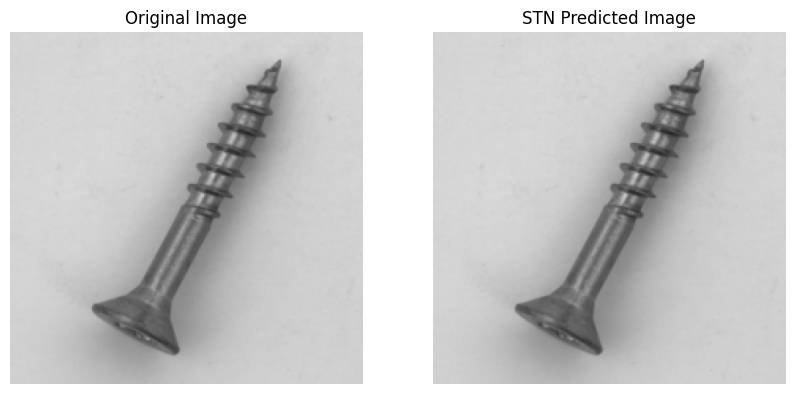

torch.Size([32, 3, 224, 224])
224


In [62]:
stn_train.visualize_stn(stn_model,train_loader)

In [64]:
stn_train.save_model(stn_model,model_name='../results/stn_model.pt')

In [65]:
stn_model_loaded = stn_train.load_model(stn_model,model_name='../results/stn_model.pt')

In [1]:
fig_pixel_rocauc,fig_img_rocauc,total_roc_auc,total_pixel_roc_auc,fig = padim_train.start(CLASS_NAMES,stn_model_loaded,data_path = '../data/mvtec_anomaly_detection',
                  arch = 'resnet18',path_results='../results/mvtec_result')

NameError: name 'padim_train' is not defined

In [ ]:
print('Average Image ROCAUC: %.3f' % np.mean(total_roc_auc))
fig_img_rocauc.title.set_text('Average image ROCAUC: %.3f' % np.mean(total_roc_auc))
fig_img_rocauc.legend(loc="lower right")

In [ ]:

print('Average pixel ROCUAC: %.3f' % np.mean(total_pixel_roc_auc))
fig_pixel_rocauc.title.set_text('Average pixel ROCAUC: %.3f' % np.mean(total_pixel_roc_auc))
fig_pixel_rocauc.legend(loc="lower right")


In [ ]:

fig.tight_layout()
fig.savefig(os.path.join('../results/mvtec_result', 'roc_curve_fresnet_18.png'), dpi=100)
